In [25]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import logging
from torchvision import datasets, transforms
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# Configure logging to show debug messages
logging.basicConfig(level=logging.DEBUG, format='%(levelname)s: %(message)s')

# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def load_dataset(flatten=False):
    num_points = 100
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    cifar10_train = datasets.MNIST(root='../../datasets', train=True, download=True, transform=transform)
    X = np.stack([np.array(img[0].numpy()) for img in cifar10_train][:num_points])  # shape: (1000, 3, 32, 32)

    original_shape = X.shape
    if flatten:
        X = X.reshape(X.shape[0], -1)
    # print(X.shape)
    return X, original_shape    

X, original_shape = load_dataset(flatten=True)
p_n_points = X.shape[0]
print("X shape: %s" % str(X.shape))
print(p_n_points)


X shape: (100, 784)
100


In [27]:
print("Creating CoverTree...")
python_covertree =  CoverTree(X, euclidean, leafsize=1)
print("CoverTree creation completed.")

Creating CoverTree...
CoverTree creation completed.


In [28]:
# Create enhanced dyadic tree with wavelet functionality
# This will show debug logs during tree construction
print("Creating DyadicTree with wavelet functionality...")
print("This will show detailed debug information about tree construction:")
print("-" * 60)

from scipy.spatial.distance import euclidean
enhanced_tree = DyadicTree(python_covertree, X, 0, X.shape[-1], inverse=True,
                          thresholds=0.0) # inverse means data in (n,d) format

print("-" * 60)
print("DyadicTree creation completed.")

DEBUG: Building tree at level 1, node indices: [89 22 15  9 57 87 71 94 85 29 17 55 97 41 43 19 56 88 47 35  1 81 21 95
 75 37 69 34 73 93 18 83 62 13 66 90 36 39 82 65 53 99  3 23 59 61 72 14
 40 67 77 11 32 78 26 79 96 24 42 33 74 12 10 49 44 50 98 48 52 84 63 51
 27  7 20 86 91 80 54 45 64 38 16 46  4  8 76  2 92  0 60 31 58  5 70  6
 68 28 25 30]
DEBUG: Updated tree height to 2
DEBUG: Processing internal node at level 1 with 36 children
DEBUG: Created child 1/36 at level 1
DEBUG: Building tree at level 2, node indices: [89 22 15  9 57 87 71]
DEBUG: Updated tree height to 3
DEBUG: Processing internal node at level 2 with 7 children
DEBUG: Created child 1/7 at level 2
DEBUG: Building tree at level 3, node indices: [89]
DEBUG: Updated tree height to 4
DEBUG: Created leaf node at level 3 with indices: [89]
DEBUG: Created child 2/7 at level 2
DEBUG: Building tree at level 3, node indices: [22]
DEBUG: Created leaf node at level 3 with indices: [22]
DEBUG: Created child 3/7 at level 2
DEB

DEBUG: Created leaf node at level 3 with indices: [19]
DEBUG: Created child 3/36 at level 1
DEBUG: Building tree at level 2, node indices: [56 88]
DEBUG: Processing internal node at level 2 with 2 children
DEBUG: Created child 1/2 at level 2
DEBUG: Building tree at level 3, node indices: [56]
DEBUG: Created leaf node at level 3 with indices: [56]
DEBUG: Created child 2/2 at level 2
DEBUG: Building tree at level 3, node indices: [88]
DEBUG: Created leaf node at level 3 with indices: [88]
DEBUG: Created child 4/36 at level 1
DEBUG: Building tree at level 2, node indices: [47 35]
DEBUG: Processing internal node at level 2 with 2 children
DEBUG: Created child 1/2 at level 2
DEBUG: Created child 3/36 at level 1
DEBUG: Building tree at level 2, node indices: [56 88]
DEBUG: Processing internal node at level 2 with 2 children
DEBUG: Created child 1/2 at level 2
DEBUG: Building tree at level 3, node indices: [56]
DEBUG: Created leaf node at level 3 with indices: [56]
DEBUG: Created child 2/2 at

Creating DyadicTree with wavelet functionality...
This will show detailed debug information about tree construction:
------------------------------------------------------------


DEBUG: Building tree at level 2, node indices: [28]
DEBUG: Created leaf node at level 2 with indices: [28]
DEBUG: Created child 35/36 at level 1
DEBUG: Building tree at level 2, node indices: [25]
DEBUG: Created leaf node at level 2 with indices: [25]
DEBUG: Created child 36/36 at level 1
DEBUG: Building tree at level 2, node indices: [30]
DEBUG: Created leaf node at level 2 with indices: [28]
DEBUG: Created child 35/36 at level 1
DEBUG: Building tree at level 2, node indices: [25]
DEBUG: Created leaf node at level 2 with indices: [25]
DEBUG: Created child 36/36 at level 1
DEBUG: Building tree at level 2, node indices: [30]
DEBUG: Created leaf node at level 2 with indices: [30]
DEBUG: Starting basis construction for wavelet tree
DEBUG: Computing basis for root node with 100 points
DEBUG: Created leaf node at level 2 with indices: [30]
DEBUG: Starting basis construction for wavelet tree
DEBUG: Computing basis for root node with 100 points
DEBUG: Root basis shape: (100, 784), sigmas: 101

info: making wavelets
------------------------------------------------------------
DyadicTree creation completed.
------------------------------------------------------------
DyadicTree creation completed.


In [10]:
# enhanced_tree.plot_tree()
# traverse dyadic tree, print all node's j and k

# print("Traversing DyadicTree to print all nodes' j and k values (checking for duplicates):")
# seen_jk = set()
# duplicates = []
# def traverse_tree(node, depth=0):
#     if node is None:
#         return
#     jk = (node.node_j, node.node_k)
#     if jk in seen_jk:
#         duplicates.append(jk)
#     else:
#         seen_jk.add(jk)
#     print(f"{' ' * depth * 2}Node at depth {depth}: j={node.node_j}, k={node.node_k}")
#     for child in node.children:
#         traverse_tree(child, depth + 1)
# traverse_tree(enhanced_tree.root)
# if duplicates:
#     print(f"Duplicate (j, k) pairs found: {duplicates}")
# else:
#     print("No duplicate (j, k) pairs found.")


In [33]:
# add some small noise to X

# X += np.random.normal(0, 0.01, X.shape)*10
print("Computing forward GMRA wavelet transform...")
gmra_q_coeff, leaves_j_k  = enhanced_tree.fgwt(X)
print("Forward transform completed.")

DEBUG: Starting forward GMRA wavelet transform for 100 data points


DEBUG: Found 100 leaf nodes, levels range: j=2 to j=5
DEBUG: Processing point 1/100, leaf at (j=2, k=85)
DEBUG: Point 0: path length 3, leaf->root traversal
DEBUG: Point 0: processed node at (j=1, k=26), qjx shape: (0, 1)
DEBUG: Point 0: completed, total coefficients at 3 levels
DEBUG: Point 1: path length 4, leaf->root traversal
DEBUG: Point 1: processed node at (j=2, k=20), qjx shape: (0, 1)
DEBUG: Point 1: processed node at (j=1, k=4), qjx shape: (6, 1)
DEBUG: Point 1: completed, total coefficients at 4 levels
DEBUG: Point 2: path length 4, leaf->root traversal
DEBUG: Processing point 1/100, leaf at (j=2, k=85)
DEBUG: Point 0: path length 3, leaf->root traversal
DEBUG: Point 0: processed node at (j=1, k=26), qjx shape: (0, 1)
DEBUG: Point 0: completed, total coefficients at 3 levels
DEBUG: Point 1: path length 4, leaf->root traversal
DEBUG: Point 1: processed node at (j=2, k=20), qjx shape: (0, 1)
DEBUG: Point 1: processed node at (j=1, k=4), qjx shape: (6, 1)
DEBUG: Point 1: comple

Computing forward GMRA wavelet transform...


DEBUG: Point 21: completed, total coefficients at 4 levels
DEBUG: Point 22: path length 4, leaf->root traversal
DEBUG: Point 22: processed node at (j=2, k=1), qjx shape: (0, 1)
DEBUG: Point 22: processed node at (j=1, k=0), qjx shape: (6, 1)
DEBUG: Point 22: completed, total coefficients at 4 levels
DEBUG: Point 22: path length 4, leaf->root traversal
DEBUG: Point 22: processed node at (j=2, k=1), qjx shape: (0, 1)
DEBUG: Point 22: processed node at (j=1, k=0), qjx shape: (6, 1)
DEBUG: Point 22: completed, total coefficients at 4 levels
DEBUG: Point 23: path length 6, leaf->root traversal
DEBUG: Point 23: processed node at (j=4, k=1), qjx shape: (0, 1)
DEBUG: Point 23: processed node at (j=3, k=41), qjx shape: (1, 1)
DEBUG: Point 23: processed node at (j=2, k=42), qjx shape: (2, 1)
DEBUG: Point 23: path length 6, leaf->root traversal
DEBUG: Point 23: processed node at (j=4, k=1), qjx shape: (0, 1)
DEBUG: Point 23: processed node at (j=3, k=41), qjx shape: (1, 1)
DEBUG: Point 23: proces

Forward transform completed.


In [ ]:
# Show some tree statistics from the debug information
print(f"Tree height: {enhanced_tree.height}")
print(f"Number of nodes in j_k_to_node mapping: {len(enhanced_tree.j_k_to_node)}")
print(f"Root node has {len(enhanced_tree.root.children)} children")
print(f"Root node indices: {enhanced_tree.root.idxs}")

# Show nodes at each level
for level in range(enhanced_tree.height):
    nodes_at_level = [node for (j, k), node in enhanced_tree.j_k_to_node.items() if j == level]
    print(f"Level {level}: {len(nodes_at_level)} nodes")

In [ ]:
# print(mydiadic_tree.height)# mydiadic_tree.grow_tree()

In [ ]:
# Now use mydiadic_tree.j_k_to_node instead of wavelet_tree.j_k_to_wavelet_node

In [ ]:
# mydiadic_tree.plot_tree()

In [ ]:
# mydiadic_tree.grow_tree()


In [ ]:
# mydiadic_tree.grow_tree()

In [ ]:
# mydiadic_tree.plot_tree()

In [34]:
print("Computing inverse GMRA wavelet transform...")
x_recon = enhanced_tree.igwt(gmra_q_coeff, leaves_j_k, X.shape)
print("Inverse transform completed.")

DEBUG: Starting inverse GMRA wavelet transform for 100 data points
DEBUG: Reconstruction target shape: (100, 784)
DEBUG: Reconstructing point 1/100
DEBUG: Point 0: starting from leaf (j=2, k=85), 3 coefficient levels
DEBUG: Point 0: leaf reconstruction, Qjx shape: (784, 1)
DEBUG: Reconstruction target shape: (100, 784)
DEBUG: Reconstructing point 1/100
DEBUG: Point 0: starting from leaf (j=2, k=85), 3 coefficient levels
DEBUG: Point 0: leaf reconstruction, Qjx shape: (784, 1)
DEBUG: Point 0: intermediate level (j=1, k=26), Qjx shape: (784, 1)
DEBUG: Point 0: intermediate level (j=1, k=26), Qjx shape: (784, 1)
DEBUG: Point 0: root level reconstruction, final Qjx shape: (784, 1)
DEBUG: Point 0: reconstruction norm: 9.557696
DEBUG: Point 1: starting from leaf (j=3, k=20), 4 coefficient levels
DEBUG: Point 1: leaf reconstruction, Qjx shape: (784, 1)
DEBUG: Point 0: root level reconstruction, final Qjx shape: (784, 1)
DEBUG: Point 0: reconstruction norm: 9.557696
DEBUG: Point 1: starting fr

Computing inverse GMRA wavelet transform...


DEBUG: Point 3: intermediate level (j=1, k=8), Qjx shape: (784, 1)
DEBUG: Point 3: root level reconstruction, final Qjx shape: (784, 1)
DEBUG: Point 4: starting from leaf (j=3, k=75), 4 coefficient levels
DEBUG: Point 4: leaf reconstruction, Qjx shape: (784, 1)
DEBUG: Point 3: root level reconstruction, final Qjx shape: (784, 1)
DEBUG: Point 4: starting from leaf (j=3, k=75), 4 coefficient levels
DEBUG: Point 4: leaf reconstruction, Qjx shape: (784, 1)
DEBUG: Point 4: intermediate level (j=2, k=80), Qjx shape: (784, 1)
DEBUG: Point 4: intermediate level (j=2, k=80), Qjx shape: (784, 1)
DEBUG: Point 4: intermediate level (j=1, k=23), Qjx shape: (784, 1)
DEBUG: Point 4: root level reconstruction, final Qjx shape: (784, 1)
DEBUG: Point 5: starting from leaf (j=2, k=89), 3 coefficient levels
DEBUG: Point 5: leaf reconstruction, Qjx shape: (784, 1)
DEBUG: Point 4: intermediate level (j=1, k=23), Qjx shape: (784, 1)
DEBUG: Point 4: root level reconstruction, final Qjx shape: (784, 1)
DEBUG: 

Inverse transform completed.


DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG: findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG: findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Ob

DEBUG: findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG: findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG: findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG: findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGener

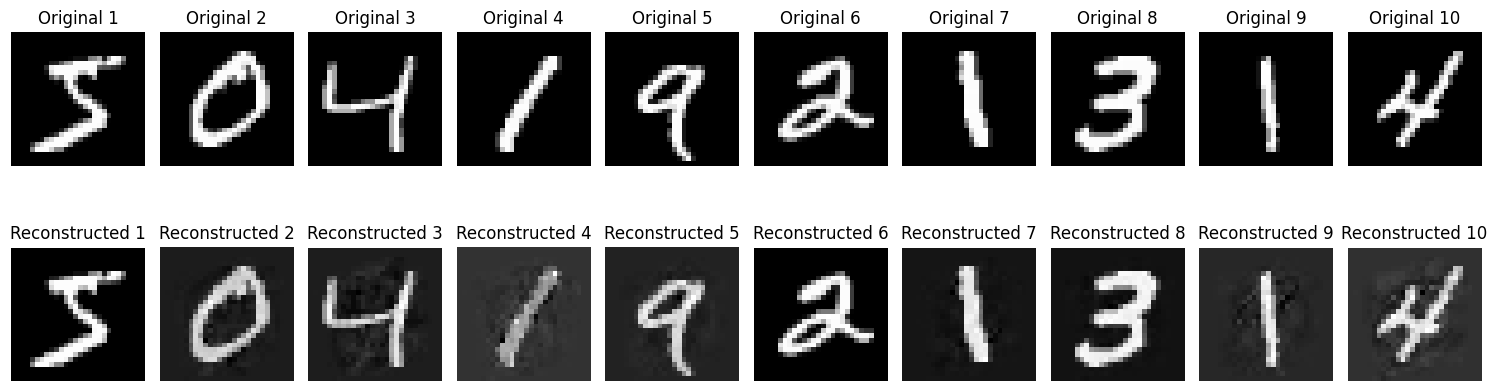

In [35]:
# plot x & x_recon for mnist in 2 row, take 5 images, remember to reshape to image

n_images = 10
fig, axs = plt.subplots(2, n_images, figsize=(15, 5))
for i in range(n_images):
    axs[0, i].imshow(X[i].reshape(original_shape[2:]), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i+1}')

    axs[1, i].imshow(x_recon[i].reshape(original_shape[2:]), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Reconstructed {i+1}')
plt.tight_layout()
plt.show()

In [36]:
# reconstruction error:
reconstruction_error = np.linalg.norm(X - x_recon, axis=1)
print("Reconstruction error (first 10):", reconstruction_error[:10])
print("Mean reconstruction error:", np.mean(reconstruction_error))

# snr signal to noise ratio
snr = 10 * np.log10(np.sum(X**2) / np.sum((X - x_recon)**2))
print("SNR:", snr)

Reconstruction error (first 10): [1.16410071e-06 9.62315093e-01 1.09329916e+00 2.84681195e+00
 8.15804285e-01 1.26395986e-06 4.71957191e-01 3.90732858e-01
 8.15804350e-01 1.39437584e+00]
Mean reconstruction error: 1.0665161293677605
SNR: 16.685943490439186
